In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
train_df=pd.read_csv('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/7 Logistic Regression/Titanic_train.csv')
test_df=pd.read_csv('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/7 Logistic Regression/Titanic_test.csv')

In [194]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
train_df.shape

(891, 12)

In [196]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [197]:
test_df.shape

(418, 11)

In [198]:
df=train_df

### EDA

In [199]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
df.shape


(891, 12)

In [201]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [202]:
# There is no duplicate Passanger Id so we can Say There is no Dupliucate Values in the Data
df['PassengerId'].duplicated().sum()

np.int64(0)

In [203]:
## Null Values
for i in df.columns:
    print(i,'-',df[i].isnull().sum())

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [204]:
687/891

0.7710437710437711

In [205]:
## More The 77 percent data is missing So we need to drop that Column

df.drop('Cabin',axis=1,inplace=True)

In [206]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [207]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

<Axes: >

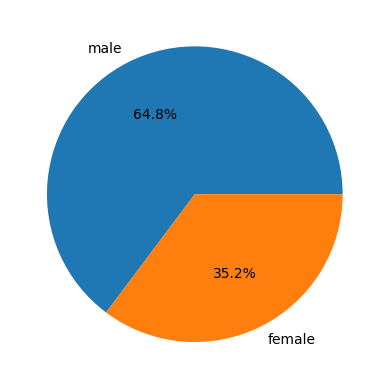

In [208]:
# Percentage Of Male and Femail in titanic
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')

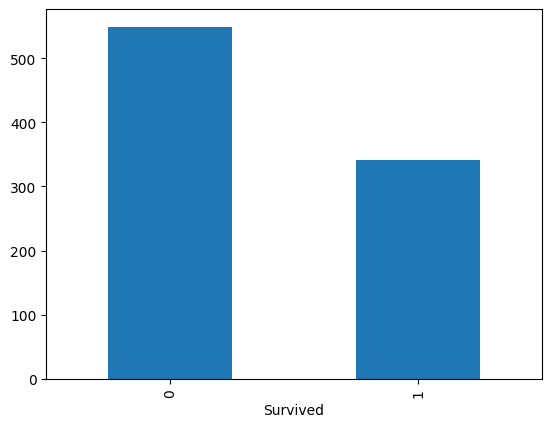

In [209]:
df['Survived'].value_counts().plot(kind='bar')
plt.show()

In [210]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [211]:
# Total male did not survive (the passenger died)
df[(df['Sex']=='male') & (df['Survived']==0)]['Survived'].value_counts()

Survived
0    468
Name: count, dtype: int64

In [212]:
# Total male Passanger Survied 
df[(df['Sex']=='male') &( df['Survived']==1)]['Survived'].value_counts()

Survived
1    109
Name: count, dtype: int64

In [213]:
# Total Female did not survive (the passenger died)
df[(df['Sex']=='female') & (df['Survived']==0)]['Survived'].value_counts()

Survived
0    81
Name: count, dtype: int64

In [214]:
# Total female Passanger Survied 
df[(df['Sex']=='female') & (df['Survived']==1)]['Survived'].value_counts()

Survived
1    233
Name: count, dtype: int64

In [215]:
# only 18 percent male survive
(109/577)*100

18.890814558058924

##### We Female Survive Chance id more Then Male

In [216]:
#  71 percent female survive
(233/314)*100

74.20382165605095

In [217]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [218]:
# Missing Value Imputation For Embarked
df['Embarked'].fillna('S', inplace=True)


C:\Users\91637\AppData\Local\Temp\ipykernel_26392\2932846239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [219]:
df[df['Embarked']=='S']['Age'].mean()

np.float64(29.5193345323741)

In [220]:
df[df['Embarked']=='C']['Age'].mean()

np.float64(30.81476923076923)

In [221]:
df[df['Embarked']=='Q']['Age'].mean()

np.float64(28.089285714285715)

##### Handeling all the Missing value in the Age Column

In [222]:
df.loc[(df['Embarked'] == 'S') & (df['Age'].isnull()), 'Age'] = 29
df.loc[(df['Embarked'] == 'C') & (df['Age'].isnull()), 'Age'] = 30
df.loc[(df['Embarked'] == 'Q') & (df['Age'].isnull()), 'Age'] = 28


In [223]:
for i in df.columns:
    print(i,'-',df[i].isnull().sum())

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 0
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Embarked - 0


In [224]:
df.shape

(891, 11)

### Handeling Categorical Column

In [225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [226]:
# Those Column Are Not Required For Our modekl We Just Drop The Like Name and Ticket And PassengerId
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [227]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [228]:
df=pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)


In [229]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


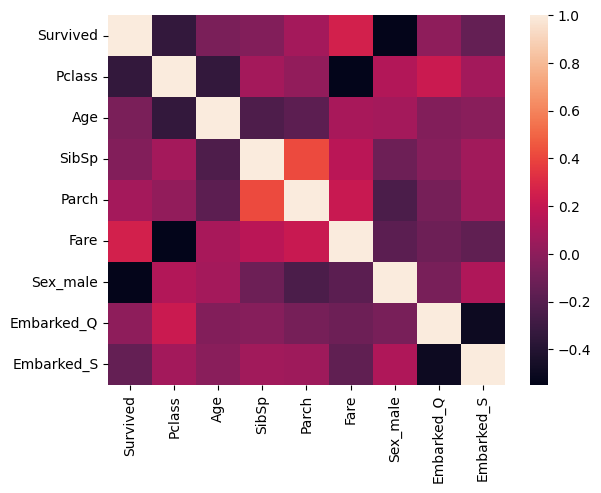

In [230]:
sns.heatmap(df.corr())
plt.show()

### ML Model Building

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split

In [232]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [233]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=34)

In [234]:
## Scalling all the Features
sc=StandardScaler()

In [235]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [236]:
model=LogisticRegression(penalty='l2',C=1,multi_class='auto',solver='saga')

In [237]:
model.fit(X_train,y_train)

C:\Users\91637\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='auto', solver='saga')

In [238]:
predict=model.predict(X_test)

In [239]:
probability_pred=model.predict_proba(X_test)[:,1]

In [240]:
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 0.8171641791044776


In [241]:
confusion_matrix(y_test, predict)

array([[150,  18],
       [ 31,  69]])

In [242]:
precision_score(y_test, predict)

0.7931034482758621

In [243]:
recall_score(y_test,predict)

0.69

In [244]:
roc_auc_score(y_test,predict)

np.float64(0.7914285714285714)

In [245]:
fpr, tpr, thresholds = roc_curve(y_test, probability_pred)

In [246]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.8520535714285714)

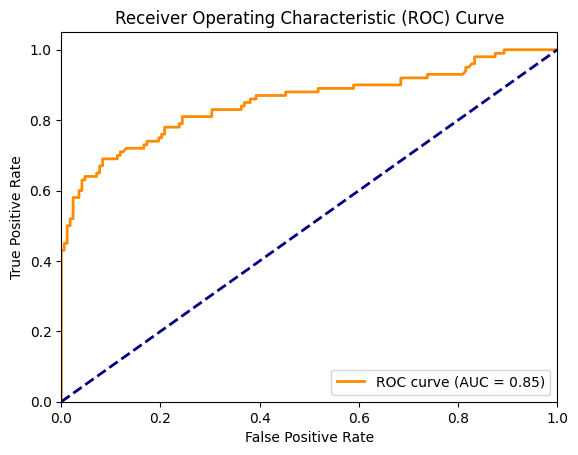

In [247]:
roc_auc = auc(fpr, tpr)

# 7. Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best Threshold (maximizing TPR - FPR): 0.5561
True Positive Rate: 0.6900
False Positive Rate: 0.0833


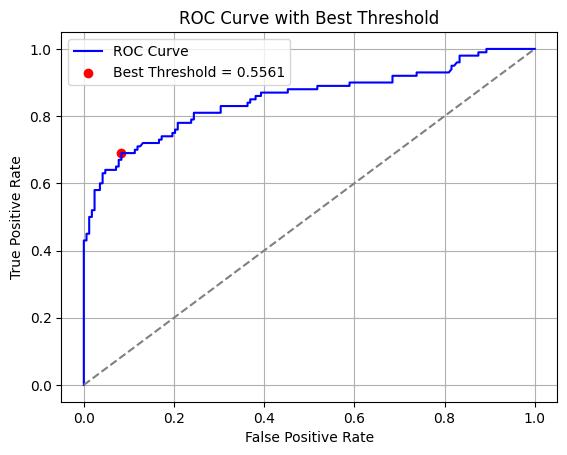

In [250]:
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

# Step 7: Print best threshold
print(f"Best Threshold (maximizing TPR - FPR): {best_threshold:.4f}")
print(f"True Positive Rate: {tpr[best_index]:.4f}")
print(f"False Positive Rate: {fpr[best_index]:.4f}")

# Step 8: Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Best Threshold = {best_threshold:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [249]:
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.69      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



1. Difference Between Precision and Recall
Precision:

Precision = True Positives / (True Positives + False Positives)

It tells us how many of the predicted positives are actually correct.

It focuses on the accuracy of positive predictions.

High precision means fewer false positives.

Recall:

Recall = True Positives / (True Positives + False Negatives)

It tells us how many of the actual positives were correctly predicted.

It focuses on catching all actual positives.

High recall means fewer false negatives.

2. What is Cross-Validation and Why Is It Important in Binary Classification
Definition:

Cross-validation is a technique to evaluate how a model performs on unseen data.

How It Works (using k-fold cross-validation):

Step 1: Split the dataset into k equal parts (folds).

Step 2: Pick one fold as the test set, use the rest k-1 folds to train the model.

Step 3: Repeat the process k times, each time with a different fold as the test set.

Step 4: Average the results from all k runs to get the final score.

Why It’s Important:

It gives a more accurate estimate of model performance.

Helps avoid overfitting and underfitting.

Useful in binary classification, especially when data is limited or imbalanced.

Helps in choosing the best model or tuning hyperparameters.

### Testing the Threshold Value

In [251]:
probability_pred=model.predict_proba(X_test)[:,1]

In [258]:
l=[]
for i in probability_pred:
    if i > 0.5561:
        l.append(1)

    else:
        l.append(0)

In [259]:
# The Result is slightly incress
confusion_matrix(y_test, l)

array([[154,  14],
       [ 31,  69]])